In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import seaborn as sns
import folium
%matplotlib inline 
!pip install pandas matplotlib seaborn


In [4]:
df = pd.read_csv('Unfiltered.csv')

In [5]:
# Display the first two rows of the dataset
df.head(2)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Frequency of observation,TERRITORIAL_LEVEL,Territorial level,TERRITORIAL_TYPE,Territorial typology,...,OBS_VALUE,Observation value,COUNTRY,Country5,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals6
0,DATAFLOW,OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0),International migration flows - Regions,I,A,Annual,TL3,TL3,_Z,Not applicable,...,0.00,NaN,CAN,Canada,A,Normal value,0,Units,2,Two
1,DATAFLOW,OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0),International migration flows - Regions,I,A,Annual,TL3,TL3,_Z,Not applicable,...,0.03,NaN,CAN,Canada,A,Normal value,0,Units,2,Two


In [6]:
df.shape

(107714, 32)

In [7]:
# Display the first few rows of the dataset
print(df.head())


  STRUCTURE                                 STRUCTURE_ID  \
0  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
1  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
2  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
3  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
4  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   

                            STRUCTURE_NAME ACTION FREQ  \
0  International migration flows - Regions      I    A   
1  International migration flows - Regions      I    A   
2  International migration flows - Regions      I    A   
3  International migration flows - Regions      I    A   
4  International migration flows - Regions      I    A   

  Frequency of observation TERRITORIAL_LEVEL Territorial level  \
0                   Annual               TL3               TL3   
1                   Annual               TL3               TL3   
2                   Annual               TL3               TL3   
3                   Annual

In [8]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107714 entries, 0 to 107713
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   STRUCTURE                 107714 non-null  object 
 1   STRUCTURE_ID              107714 non-null  object 
 2   STRUCTURE_NAME            107714 non-null  object 
 3   ACTION                    107714 non-null  object 
 4   FREQ                      107714 non-null  object 
 5   Frequency of observation  107714 non-null  object 
 6   TERRITORIAL_LEVEL         107714 non-null  object 
 7   Territorial level         107714 non-null  object 
 8   TERRITORIAL_TYPE          107714 non-null  object 
 9   Territorial typology      107714 non-null  object 
 10  REF_AREA                  107714 non-null  object 
 11  Reference area            107714 non-null  object 
 12  MEASURE                   107714 non-null  object 
 13  Measure2                  107714 non-null  o

In [9]:
# Summary statistics of numerical columns
print(df.describe())

         TIME_PERIOD  Time period     OBS_VALUE  Observation value  UNIT_MULT  \
count  107714.000000          0.0  1.077140e+05                0.0   107714.0   
mean     2010.702508          NaN  3.916206e+03                NaN        0.0   
std         6.681903          NaN  3.210119e+04                NaN        0.0   
min      1995.000000          NaN -8.402560e+05                NaN        0.0   
25%      2005.000000          NaN  3.200000e-01                NaN        0.0   
50%      2011.000000          NaN  4.100000e+01                NaN        0.0   
75%      2016.000000          NaN  1.066000e+03                NaN        0.0   
max      2022.000000          NaN  2.136954e+06                NaN        0.0   

            DECIMALS  
count  107714.000000  
mean        0.720816  
std         0.960242  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max         2.000000  


In [10]:
# Check for missing values
print(df.isnull().sum())

STRUCTURE                        0
STRUCTURE_ID                     0
STRUCTURE_NAME                   0
ACTION                           0
FREQ                             0
Frequency of observation         0
TERRITORIAL_LEVEL                0
Territorial level                0
TERRITORIAL_TYPE                 0
Territorial typology             0
REF_AREA                         0
Reference area                   0
MEASURE                          0
Measure2                         0
AGE                              0
Age3                             0
SEX                              0
Sex4                             0
UNIT_MEASURE                     0
Unit of measure                  0
TIME_PERIOD                      0
Time period                 107714
OBS_VALUE                        0
Observation value           107714
COUNTRY                          0
Country5                         0
OBS_STATUS                       0
Observation status               0
UNIT_MULT           

In [11]:
# Remove two columns name is 'Time period' and 'Flags'
df_cleaned = df.drop(['Time period', 'Observation value'], axis=1)

In [12]:
df_cleaned.head(2)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Frequency of observation,TERRITORIAL_LEVEL,Territorial level,TERRITORIAL_TYPE,Territorial typology,...,TIME_PERIOD,OBS_VALUE,COUNTRY,Country5,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals6
0,DATAFLOW,OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0),International migration flows - Regions,I,A,Annual,TL3,TL3,_Z,Not applicable,...,2001,0.00,CAN,Canada,A,Normal value,0,Units,2,Two
1,DATAFLOW,OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0),International migration flows - Regions,I,A,Annual,TL3,TL3,_Z,Not applicable,...,2002,0.03,CAN,Canada,A,Normal value,0,Units,2,Two


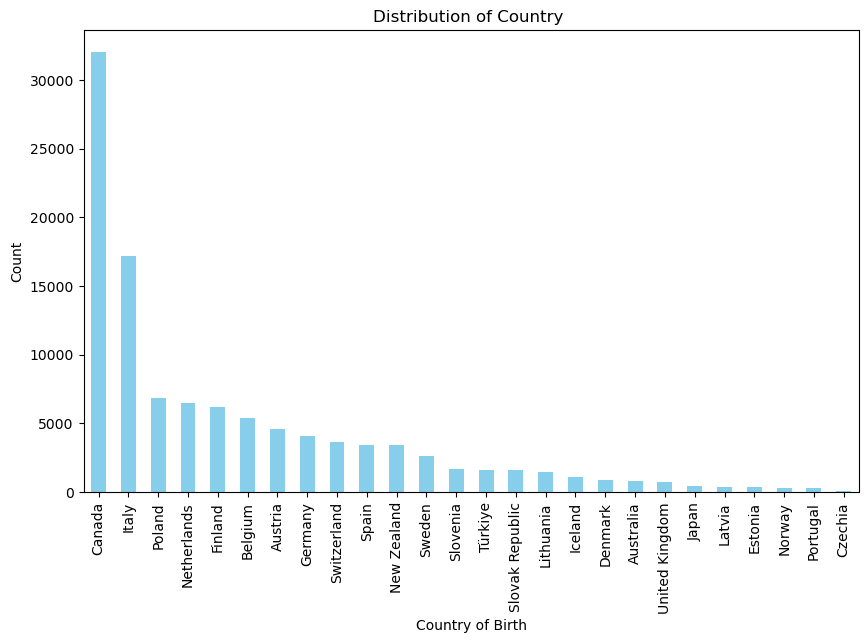

In [13]:
# Bar chart for 'Country of birth'
plt.figure(figsize=(10, 6))
df_cleaned['Country5'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Country ')
plt.xlabel('Country of Birth')
plt.ylabel('Count')
plt.show()

Top 5 countries that contributed the most to immigration

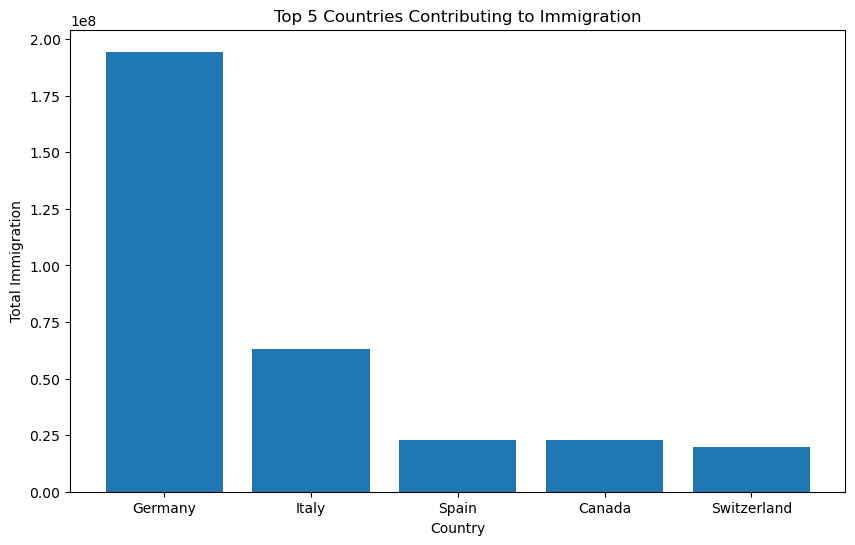

In [14]:

# Assuming 'COUNTRY' column represents the countries and 'OBS_VALUE' represents the immigration values
immigration_data = df.groupby('Country5')['OBS_VALUE'].sum().reset_index()

# Sort the data in descending order based on immigration values
sorted_immigration_data = immigration_data.sort_values(by='OBS_VALUE', ascending=False)

# Select the top 5 countries
top_5_countries = sorted_immigration_data.head(5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Country5'], top_5_countries['OBS_VALUE'])
plt.title('Top 5 Countries Contributing to Immigration')
plt.xlabel('Country')
plt.ylabel('Total Immigration')
plt.show()

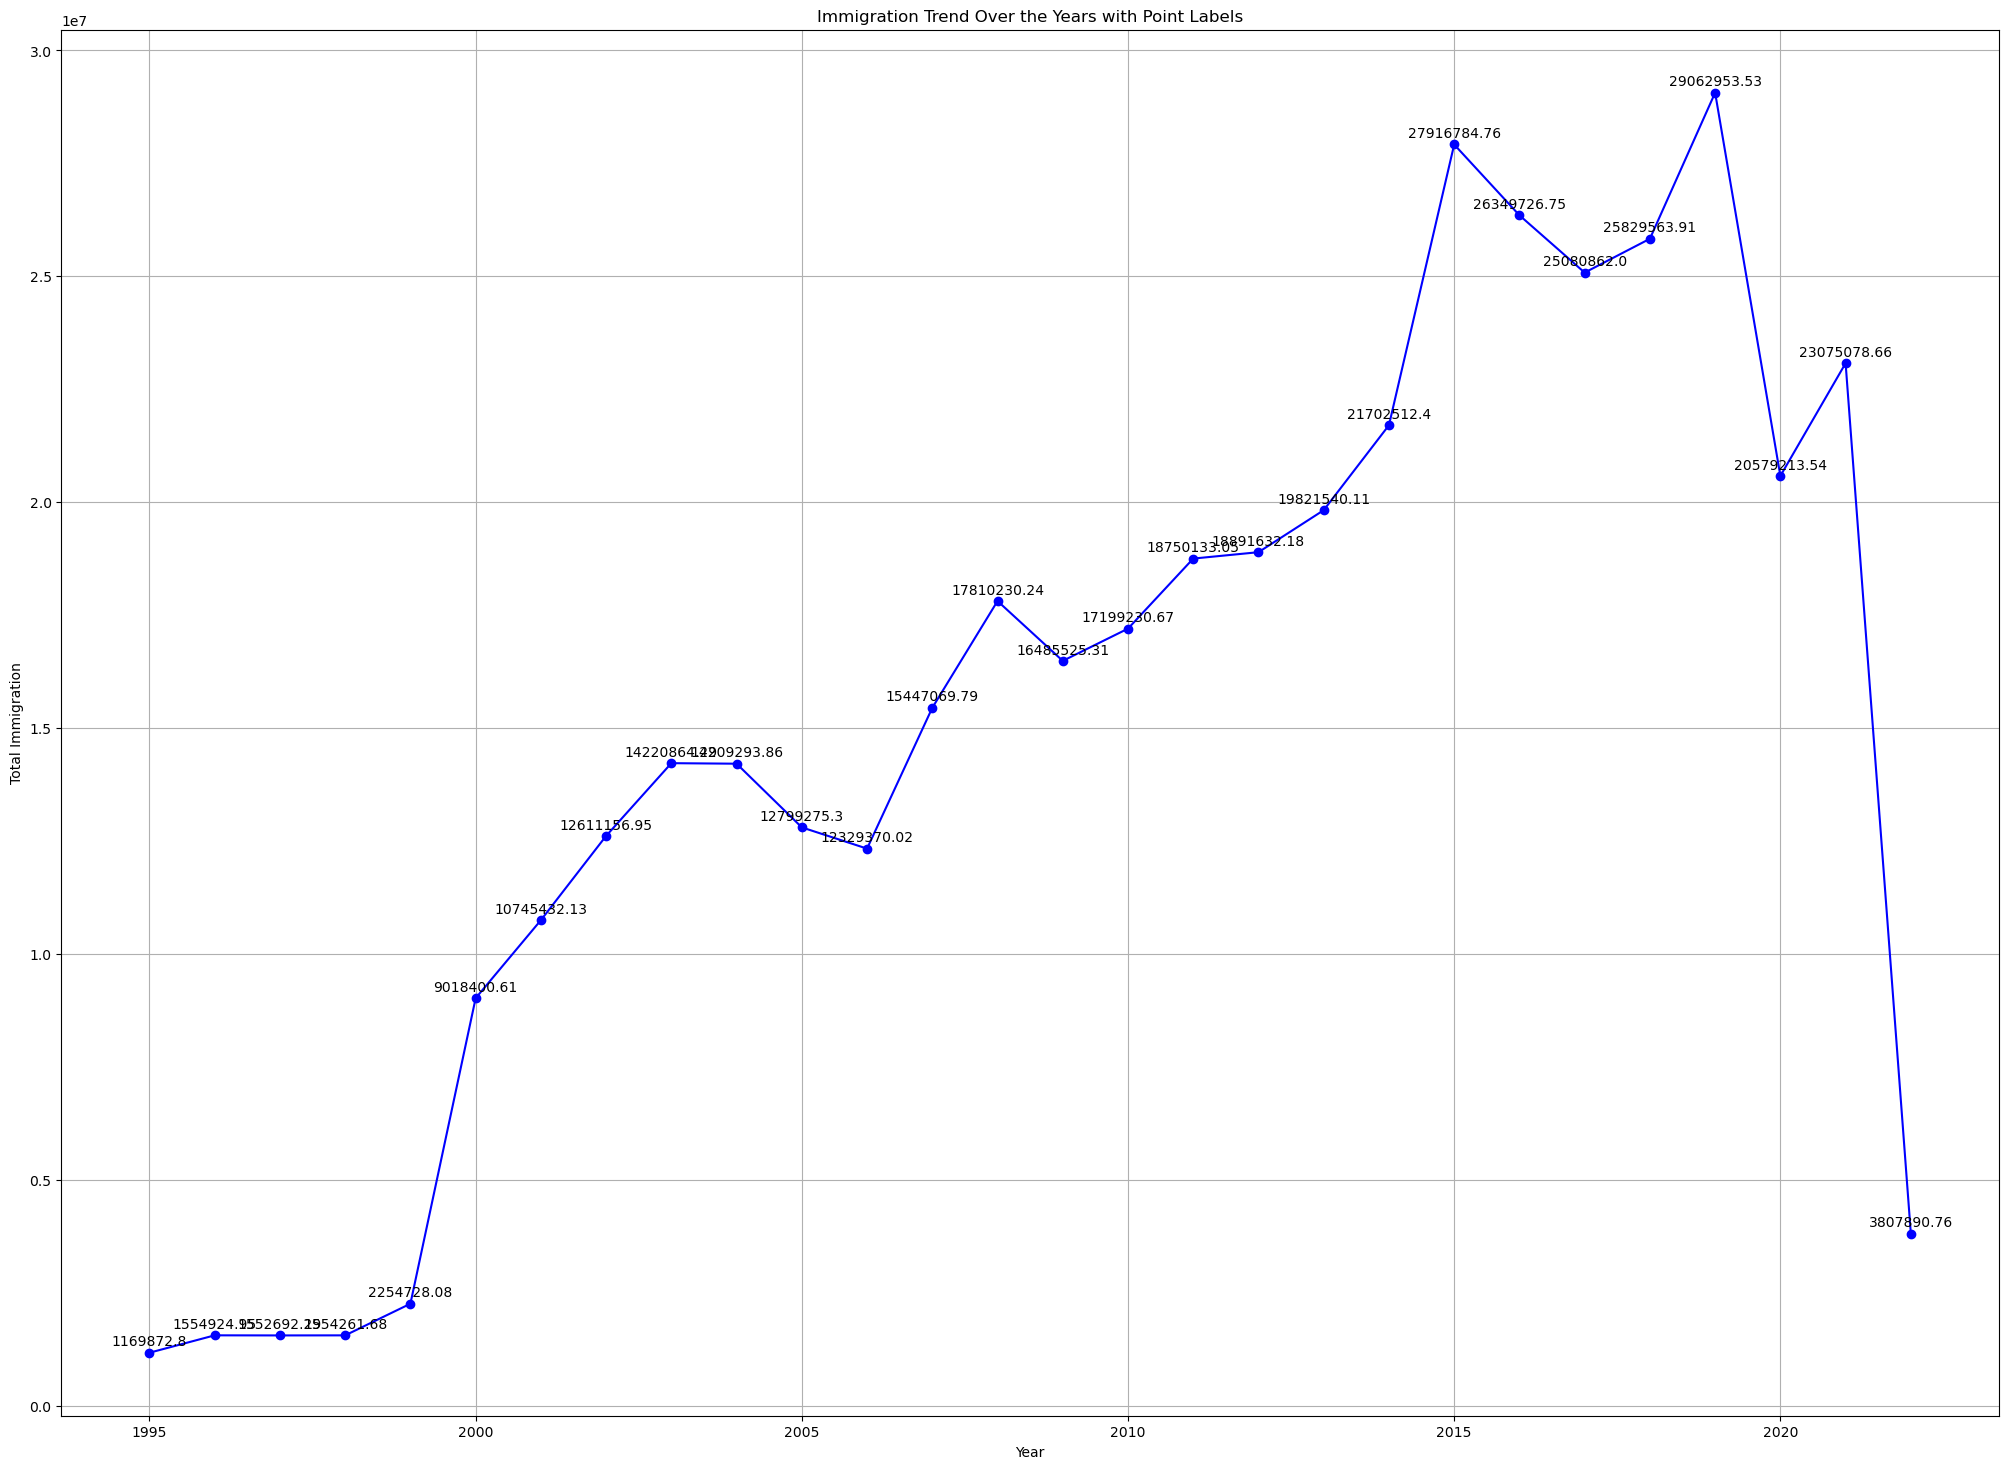

In [15]:
# Assuming 'TIME_PERIOD' column represents the years and 'OBS_VALUE' represents the immigration values
trend_data = df.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()

# Plot the trend with point labels
plt.figure(figsize=(25, 18))
plt.plot(trend_data['TIME_PERIOD'], trend_data['OBS_VALUE'], marker='o', linestyle='-', color='b')

# Annotate points with their immigration values
for i, txt in enumerate(trend_data['OBS_VALUE']):
    plt.annotate(txt, (trend_data['TIME_PERIOD'].iloc[i], trend_data['OBS_VALUE'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Immigration Trend Over the Years with Point Labels')
plt.xlabel('Year')
plt.ylabel('Total Immigration')
plt.grid(True)
plt.show()


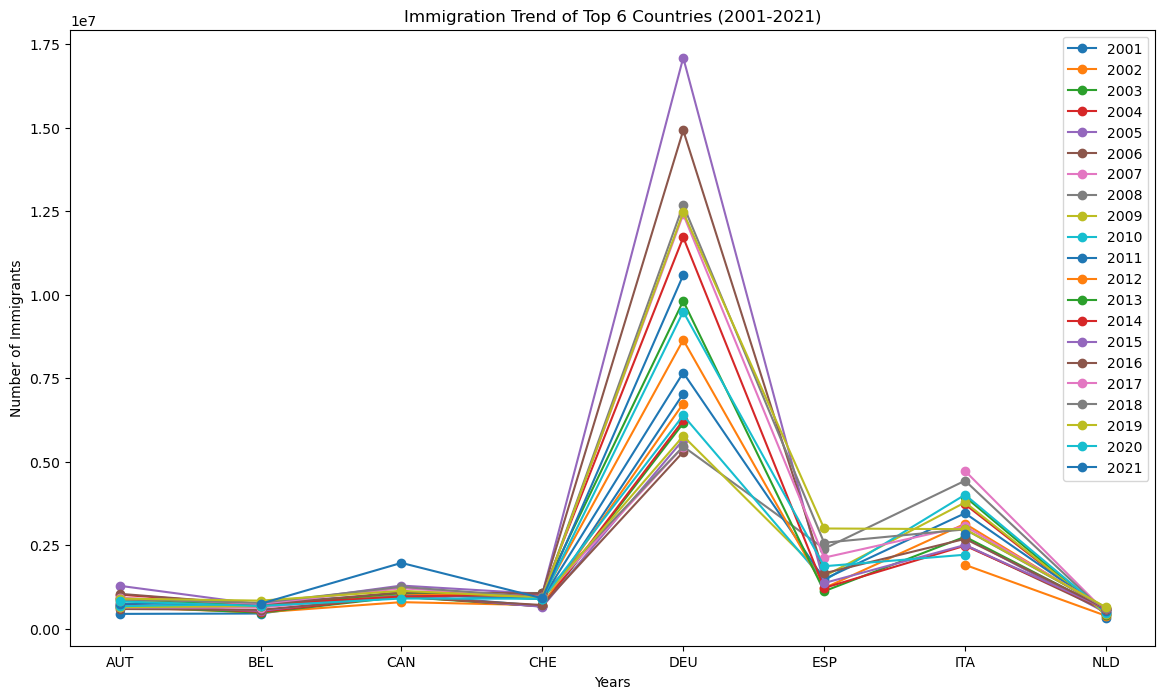

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Replace 'df' with the actual variable name if it's different

# Get the top 6 entries, including Canada
df_top6 = df.groupby('COUNTRY')['OBS_VALUE'].sum().nlargest(8)

# Filter dataframe for the years 2001 to 2021
df_filtered = df[(df['TIME_PERIOD'] >= 2001) & (df['TIME_PERIOD'] <= 2021)]

# Transpose the dataframe
df_top6_trend = df_filtered[df_filtered['COUNTRY'].isin(df_top6.index)].groupby(['COUNTRY', 'TIME_PERIOD'])['OBS_VALUE'].sum().unstack()

# Plot the dataframe with labels
plt.figure(figsize=(14, 8))

for country in df_top6_trend.columns:
    plt.plot(df_top6_trend.index, df_top6_trend[country], marker='o', label=country)



plt.title('Immigration Trend of Top 6 Countries (2001-2021)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.legend()  # Show legend with country labels
plt.show()


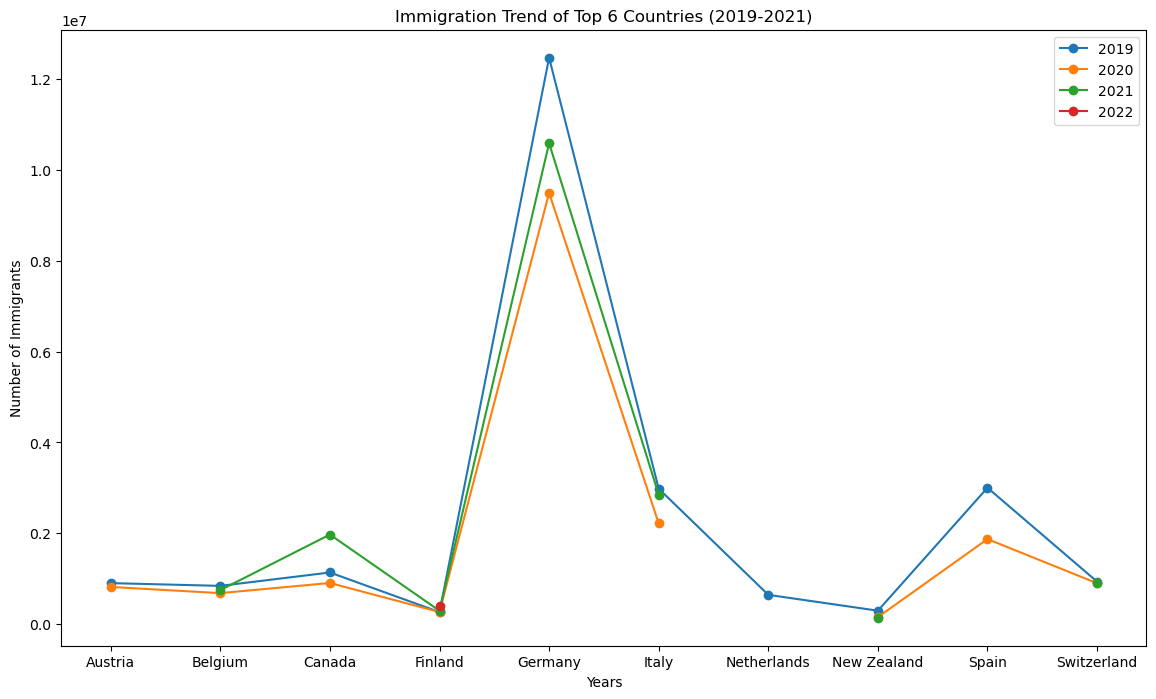

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Replace 'df' with the actual variable name if it's different

# Get the top 6 entries, including Canada
df_top6 = df.groupby('Country5')['OBS_VALUE'].sum().nlargest(10)

# Filter dataframe for the last 3 years
df_filtered = df[df['TIME_PERIOD'] >= 2019]

# Transpose the dataframe
df_top6_trend = df_filtered[df_filtered['Country5'].isin(df_top6.index)].groupby(['Country5', 'TIME_PERIOD'])['OBS_VALUE'].sum().unstack()

# Plot the dataframe with labels
plt.figure(figsize=(14, 8))

for country in df_top6_trend.columns:
    plt.plot(df_top6_trend.index, df_top6_trend[country], marker='o', label=country)


plt.title('Immigration Trend of Top 6 Countries (2019-2021)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.legend()  # Show legend with country labels
plt.show()


What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2022?

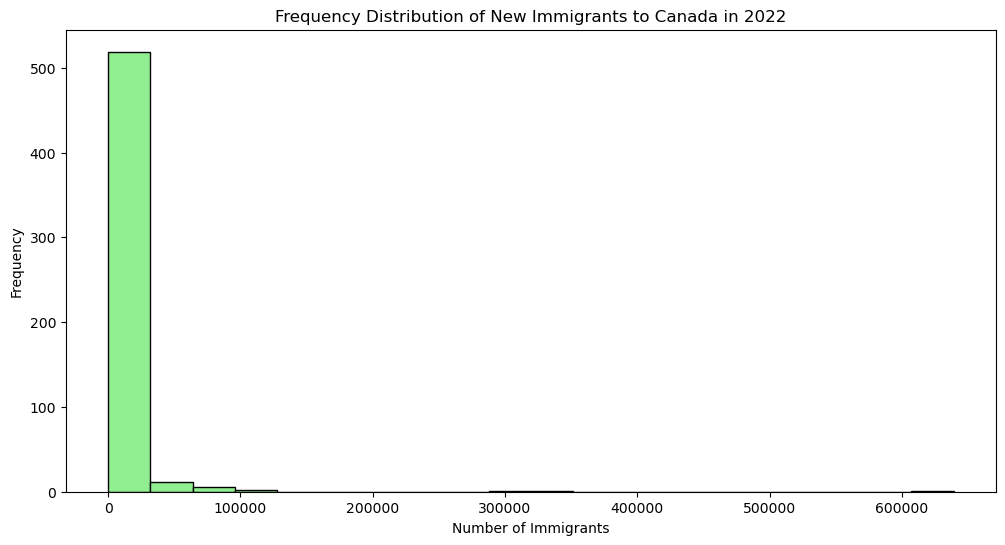

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Replace 'df' with the actual variable name if it's different

# Filter the dataframe for the year 2013
df_2013 = df_cleaned[df_cleaned['TIME_PERIOD'] == 2022]

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
df_2013['OBS_VALUE'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')

plt.title('Frequency Distribution of New Immigrants to Canada in 2022')
plt.xlabel('Number of Immigrants')
plt.ylabel('Frequency')
plt.show()


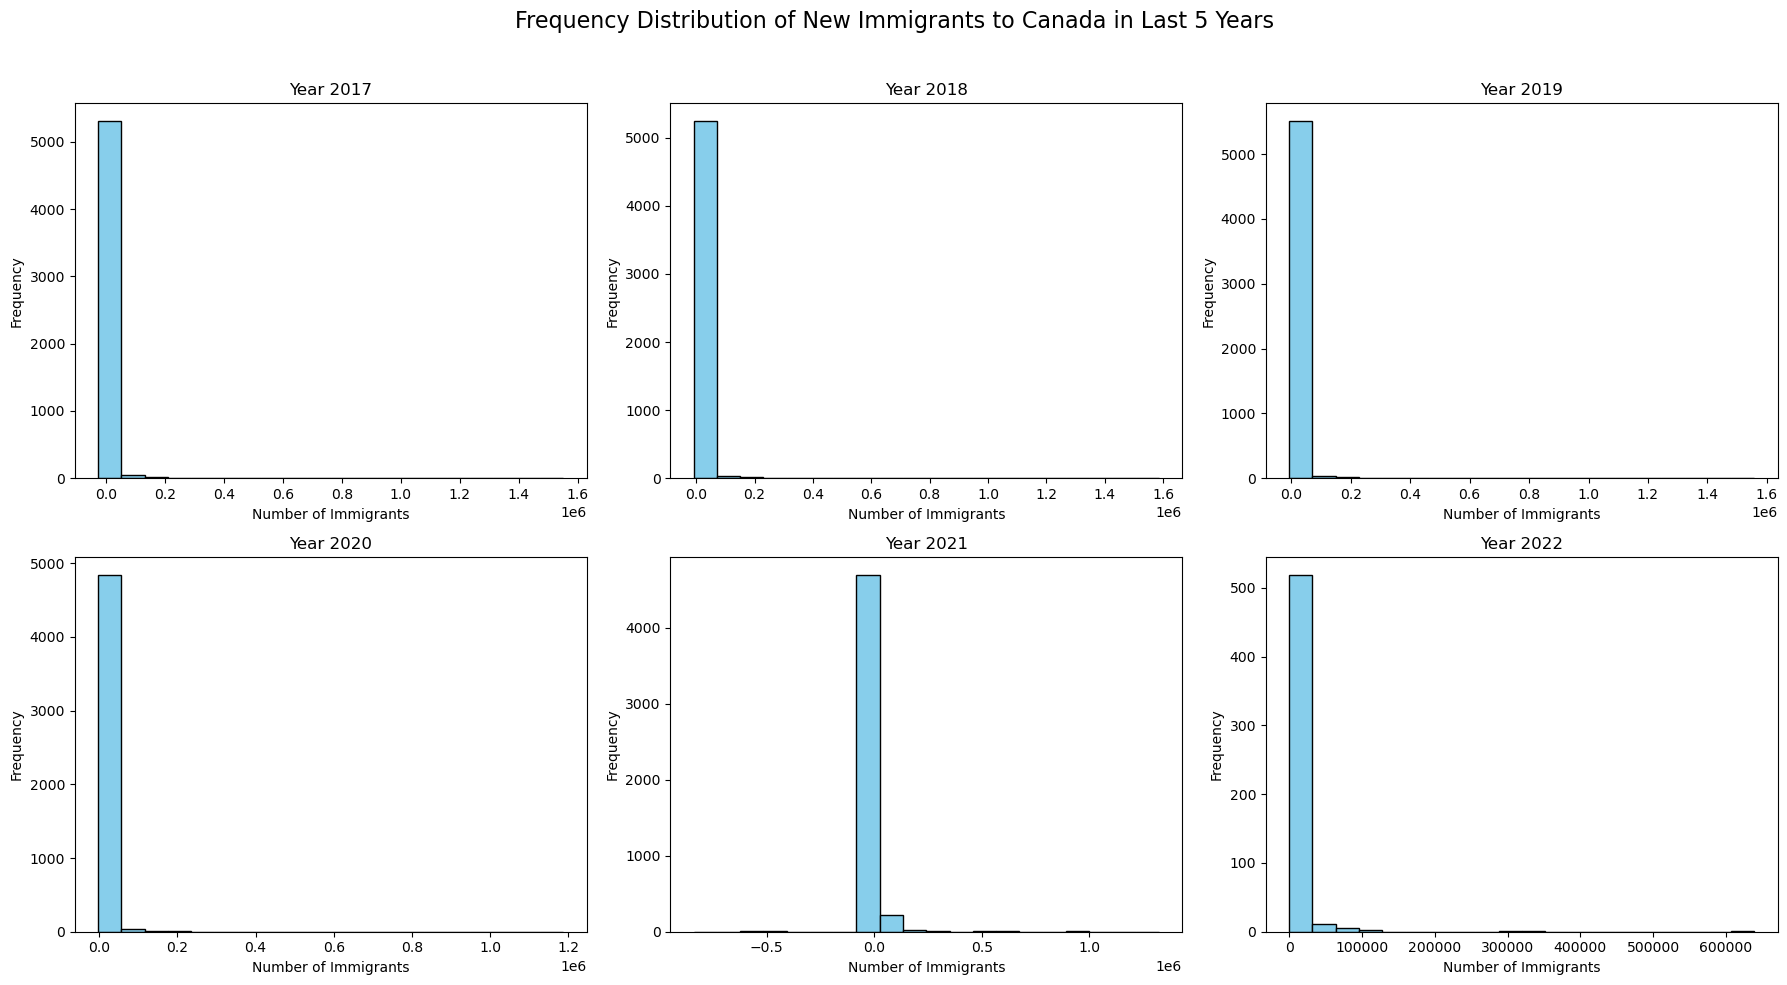

In [19]:
# Get the unique years in the dataset
unique_years = df['TIME_PERIOD'].unique()
last_5_years = sorted(unique_years)[-6:]

# Create subplots for each of the last 5 years
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Frequency Distribution of New Immigrants to Canada in Last 5 Years', fontsize=16)

for i, year in enumerate(last_5_years):
    df_year = df[df['TIME_PERIOD'] == year]
    ax = axes[i // 3, i % 3]

    ax.hist(df_year['OBS_VALUE'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Number of Immigrants')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your data is stored in a DataFrame named 'df'
# You can create the DataFrame using the provided data

# Convert 'OBS_VALUE' column to numeric, ignoring errors
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')

# Drop rows with missing values in 'OBS_VALUE' column
df.dropna(subset=['OBS_VALUE'], inplace=True)

# Calculate Z-scores for 'OBS_VALUE' column
z_scores = np.abs(stats.zscore(df['OBS_VALUE']))

# Set the Z-score threshold for outliers
z_score_threshold = 3.0

# Identify outliers
outliers = z_scores > z_score_threshold

# Display the outliers
print("Outliers:")
print(df[outliers])


Outliers:
       STRUCTURE                                 STRUCTURE_ID  \
512     DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
1130    DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
1415    DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
1771    DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
1772    DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
...          ...                                          ...   
107495  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
107496  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
107497  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
107498  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   
107499  DATAFLOW  OECD.CFE.EDS:DSD_REG_DEMO@DF_MIGR_FLOW(1.0)   

                                 STRUCTURE_NAME ACTION FREQ  \
512     International migration flows - Regions      I    A   
1130    International migration flows - Regions      I    A   
1415    Internationa

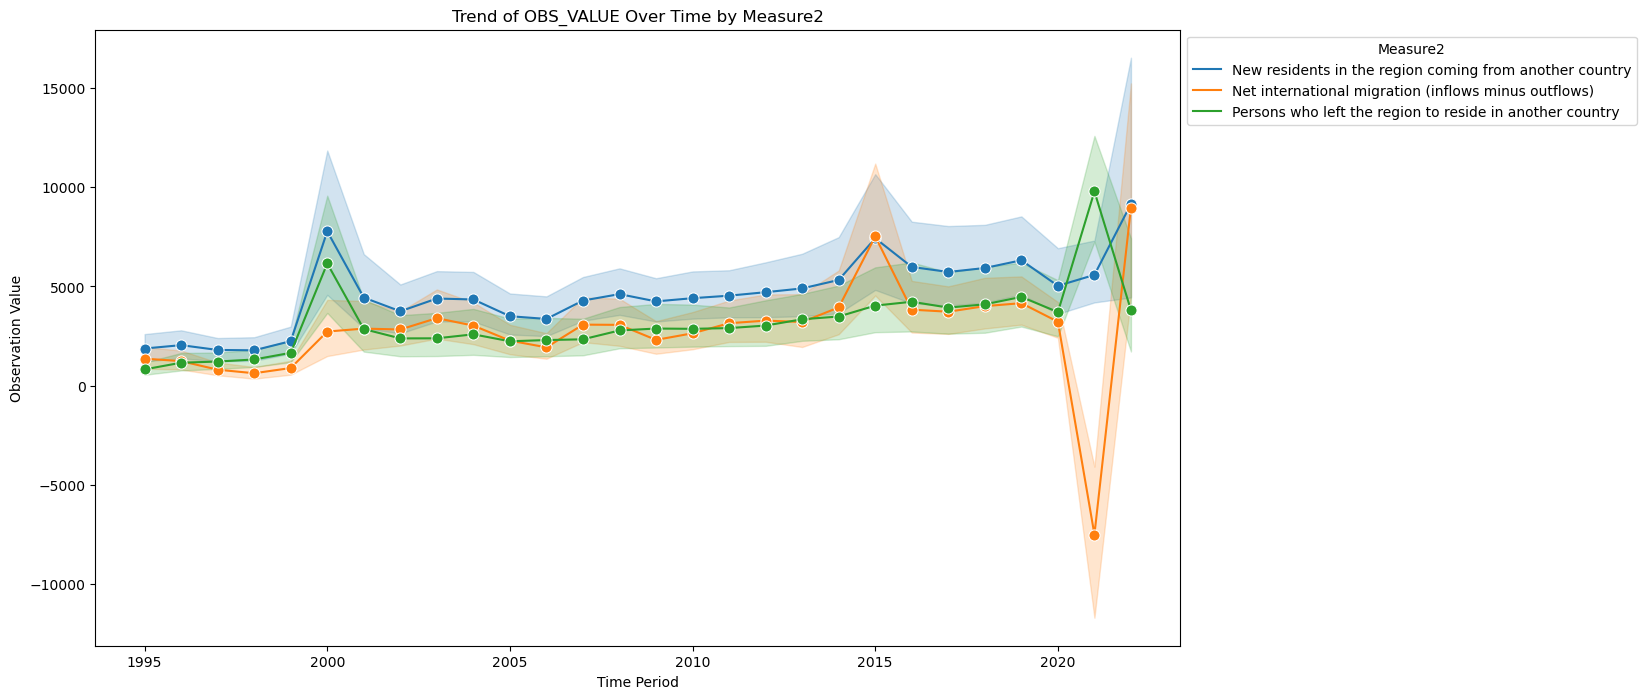

In [22]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='Measure2', data=df, marker='o', markersize=8)
plt.title('Trend of OBS_VALUE Over Time by Measure2')
plt.xlabel('Time Period')
plt.ylabel('Observation Value')
plt.legend(title='Measure2', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

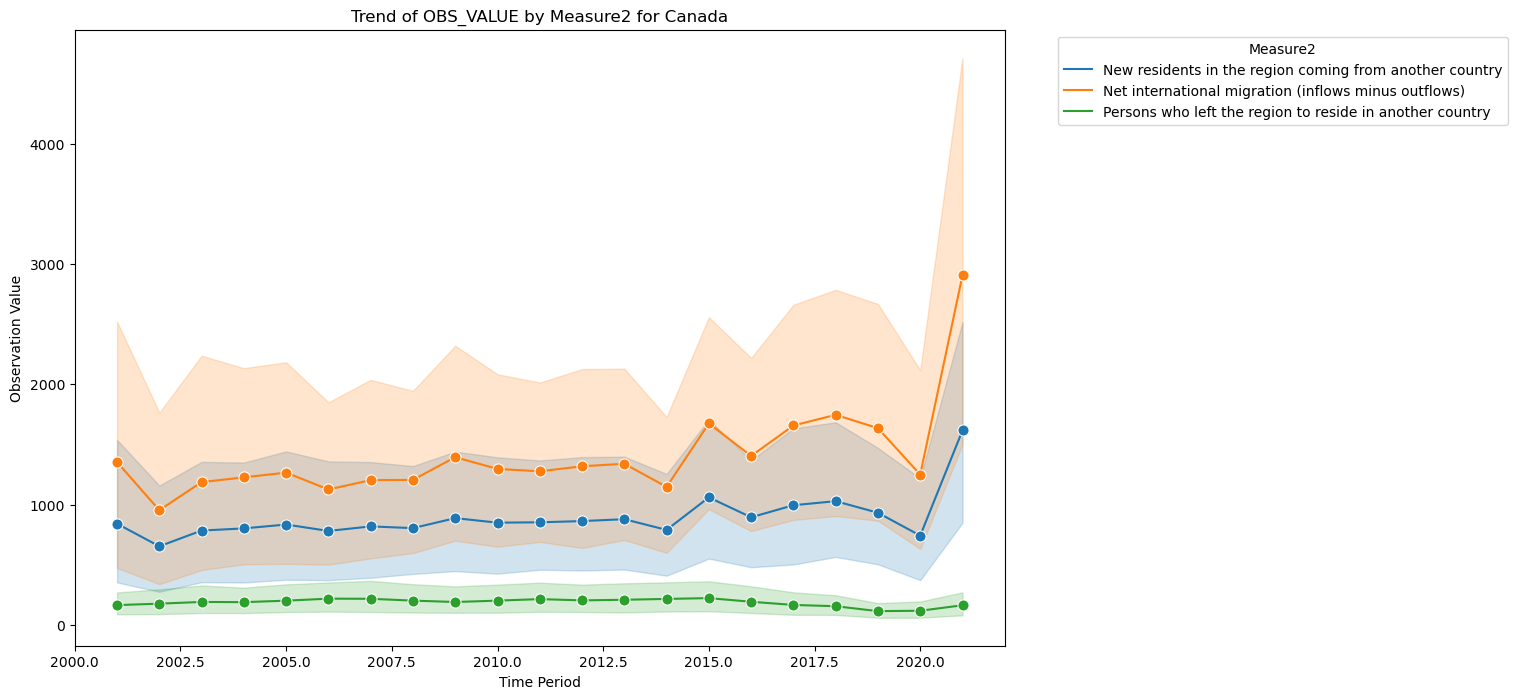

In [23]:
# Select a specific country for visualization
country_to_plot = 'Canada'

# Filter the dataset for the selected country
df_country = df[df['Country5'] == country_to_plot]

# Plot the trend of OBS_VALUE over TIME_PERIOD for different Measure2
plt.figure(figsize=(12, 8))
sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='Measure2', data=df_country, marker='o', markersize=8)
plt.title(f'Trend of OBS_VALUE by Measure2 for {country_to_plot}')
plt.xlabel('Time Period')
plt.ylabel('Observation Value')
plt.legend(title='Measure2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

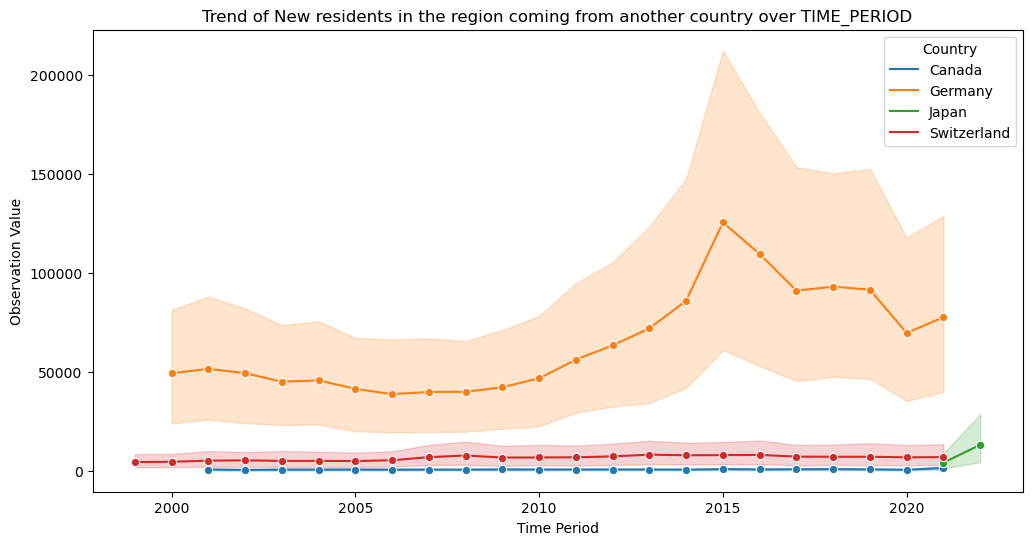

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select countries and Measure2 of interest
countries_of_interest = ['Canada', 'Switzerland', 'Germany', 'Japan']
measure2_of_interest = 'New residents in the region coming from another country'

# Filter the DataFrame
filtered_df = df[(df['Country5'].isin(countries_of_interest)) & (df['Measure2'] == measure2_of_interest)]

# Plot the trend for each country
plt.figure(figsize=(12, 6))
sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='Country5', data=filtered_df, marker='o')
plt.title(f'Trend of {measure2_of_interest} over TIME_PERIOD')
plt.xlabel('Time Period')
plt.ylabel('Observation Value')
plt.legend(title='Country')
plt.show()


In [25]:
import pandas as pd

# Assuming you have cleaned your data and stored it in a DataFrame called 'cleaned_data'
# If not, replace this with your actual DataFrame

# For example:
# cleaned_data = your_data_processing_function(original_data)

# Save the cleaned data to an Excel file
output_file_path = 'df_cleaned.xlsx'
df_cleaned.to_excel(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")


Cleaned data saved to df_cleaned.xlsx


In [ ]:
from flask import Flask, send_file
app = Flask(__name__)

@app.route('/download_cleaned_data')
def download_cleaned_data():
    # Assuming the cleaned_data DataFrame is available here
    cleaned_data = your_data_processing_function(original_data)

    # Save the cleaned data to an Excel file
    output_file_path = 'df_cleaned.xlsx'
    df_cleaned.to_excel(output_file_path, index=False)

    return send_file(output_file_path, as_attachment=True)

if __name__ == '__main__':
    app.run(debug=True)


In [29]:
!pip install flask

In [31]:
import pandas as pd

# Load the unfiltered dataset
unfiltered_filename = "Unfiltered.csv"
df = pd.read_csv(unfiltered_filename)

# Perform your data cleaning operations here
# ...

# Save the cleaned dataset to a new CSV file
cleaned_filename = "cleaned_dataset.csv"
df.to_csv(cleaned_filename, index=False)

# If you want to save it as an Excel file, uncomment the following line
# cleaned_filename = "cleaned_dataset.xlsx"
# df.to_excel(cleaned_filename, index=False)

print(f"Cleaned dataset saved to {cleaned_filename}")


Cleaned dataset saved to cleaned_dataset.csv
